In [2]:
#importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import statsmodels.api as sm
import statsmodels
from scipy.stats import probplot
from sklearn.preprocessing import StandardScaler

C:\Users\Mukul\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\Mukul\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [5]:
np.random.seed(42)
import ptitprince as pt
import warnings
warnings.filterwarnings("ignore")

In [110]:
train_df = pd.read_csv("../../Excel/House Price Dataset/train.csv")

In [124]:
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [75]:
train_df.shape

(1460, 80)

In [112]:
train_df.drop(["Id"], axis = 1, inplace = True)

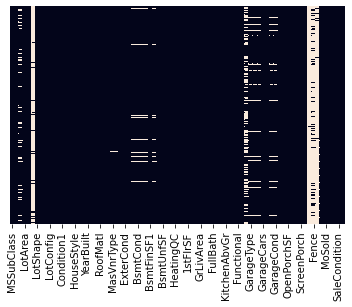

In [57]:
#Checkng for Null Values
sns.heatmap(train_df.isnull(), cbar = False, yticklabels = False) #It seems there are lot of null values available in our dataset

In [66]:
pd.set_option("display.max_rows", 90) #Extending the display max views for rows

In [67]:
train_df.isnull().sum()/train_df.shape[0]*100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [77]:
print(train_df["MiscFeature"].value_counts())
print("-------------------------------------")
print(train_df["Fence"].value_counts())
print("-------------------------------------")
print(train_df["PoolQC"].value_counts())
print("-------------------------------------")
print(train_df["Alley"].value_counts())

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64
-------------------------------------
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
-------------------------------------
Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64
-------------------------------------
Grvl    50
Pave    41
Name: Alley, dtype: int64


In [113]:
train_df_copy = train_df

In [114]:
train_df_copy.drop(labels = ["MiscFeature", "Fence", "PoolQC", "Alley"], axis = 1, inplace = True)

In [115]:
train_df_copy.isnull().sum()/train_df_copy.shape[0]*100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
H

In [116]:
columns = []

In [117]:
#Let's find the columns with null values
for i in train_df_copy.columns:
    if train_df_copy[i].isnull().sum() > 0:
        columns.append(i)

In [118]:
train_df_copy[columns].isnull().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [150]:
for i in columns:
    train_df_copy[i].fillna(train_df_copy[i].mode()[0], inplace = True)

In [151]:
train_df_copy[columns].isnull().sum()

LotFrontage     0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [153]:
train_df_copy

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [168]:
cat_columns = []

In [183]:
train_df_copy.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [173]:
for i in train_df_copy.columns:
    if train_df_copy[i].dtypes == "object":
        cat_columns.append(i)

In [186]:
train_df_copy[cat_columns]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal


In [187]:
from sklearn.preprocessing import LabelEncoder

In [188]:
le = LabelEncoder()

In [190]:
for i in train_df_copy[cat_columns]:
    train_df_copy[i] = le.fit_transform(train_df_copy[i])

In [196]:
train_df_copy[cat_columns]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,2,6,2,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,3,6,4,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,2,6,4,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,2,6,2,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,2,6,4,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,3,6,4,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,...,3,2,4,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,...,2,6,2,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,...,2,6,2,1,2,4,4,2,8,4


In [213]:
test_df = pd.read_csv("../../Excel/House Price Dataset/test.csv")

In [214]:
test_df.isnull().sum()/test_df.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
Street            0.000000
Alley            92.666210
LotShape          0.000000
LandContour       0.000000
Utilities         0.137080
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.068540
Exterior2nd       0.068540
MasVnrType        1.096642
MasVnrArea        1.028101
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          3.015764
BsmtCond          3.084304
BsmtExposure      3.015764
BsmtFinType1      2.878684
BsmtFinSF1        0.068540
BsmtFinType2      2.878684
BsmtFinSF2        0.068540
B

In [215]:
test_df.drop(labels = ["MiscFeature", "Fence", "PoolQC", "Alley"], axis = 1, inplace = True)

In [216]:
test_df.isnull().sum()/train_df_copy.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.273973
LotFrontage      15.547945
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.136986
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.068493
Exterior2nd       0.068493
MasVnrType        1.095890
MasVnrArea        1.027397
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          3.013699
BsmtCond          3.082192
BsmtExposure      3.013699
BsmtFinType1      2.876712
BsmtFinSF1        0.068493
BsmtFinType2      2.876712
BsmtFinSF2        0.068493
BsmtUnfSF         0.068493
T

In [217]:
test_columns = []

In [218]:
#Let's find the columns with null values
for i in test_df.columns:
    if test_df[i].isnull().sum() > 0:
        test_columns.append(i)

In [219]:
test_df[test_columns].isnull().sum()

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
FireplaceQu     730
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64

In [220]:
for i in test_columns:
    test_df[i].fillna(test_df[i].mode()[0], inplace = True)

In [221]:
train_df_copy[columns].isnull().sum()

LotFrontage     0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [222]:
test_cat_columns = []

In [223]:
for i in test_df.columns:
    if test_df[i].dtypes == "object":
        test_cat_columns.append(i)

In [224]:
test_cat_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [225]:
le_ = LabelEncoder()

In [226]:
for i in test_df[test_cat_columns]:
    test_df[i] = le_.fit_transform(test_df[i])

In [228]:
test_df[test_cat_columns]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,2,1,3,3,0,4,0,12,1,2,...,3,6,2,1,2,3,4,2,8,4
1,3,1,0,3,0,0,0,12,2,2,...,2,6,2,1,2,3,4,2,8,4
2,3,1,0,3,0,4,0,8,2,2,...,3,6,4,1,0,3,4,2,8,4
3,3,1,0,3,0,4,0,8,2,2,...,2,6,2,1,0,3,4,2,8,4
4,3,1,0,1,0,4,0,22,2,2,...,2,6,2,1,1,3,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1,3,3,0,4,0,10,2,2,...,3,6,2,1,2,3,4,2,8,4
1455,4,1,3,3,0,4,0,10,2,2,...,3,6,2,4,2,3,4,2,8,0
1456,3,1,3,3,0,4,0,11,2,2,...,3,6,4,5,2,3,4,2,8,0
1457,3,1,3,3,0,4,0,11,2,2,...,3,6,2,1,2,3,4,2,8,4


In [234]:
test_df.drop(labels = "Id", axis = 1, inplace = True)

In [694]:
copy_train = train_df_copy.copy()
copy_test = test_df.copy()

In [244]:
copy_train.loc[:,"Train"] = 1

In [695]:
copy_test.loc[:,"Train"] = 0

In [252]:
finaldf = pd.concat([copy_train, copy_test], axis = 0)

In [254]:
finaldf["Train"].value_counts()

1    1460
0    1459
Name: Train, dtype: int64

In [320]:
train_df_eda = finaldf[finaldf["Train"] == 1].drop(labels = ["Train"], axis = 1)

## Exploratory Data Analysis

In [321]:
train_df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
MSZoning,1460.0,3.028767,0.632017,0.0,3.00,3.0,3.00,4.0
LotFrontage,1460.0,68.267123,22.356355,21.0,60.00,63.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
Street,1460.0,0.995890,0.063996,0.0,1.00,1.0,1.00,1.0
LotShape,1460.0,1.942466,1.409156,0.0,0.00,3.0,3.00,3.0
LandContour,1460.0,2.777397,0.707666,0.0,3.00,3.0,3.00,3.0
Utilities,1460.0,0.000685,0.026171,0.0,0.00,0.0,0.00,1.0
LotConfig,1460.0,3.019178,1.622634,0.0,2.00,4.0,4.00,4.0
LandSlope,1460.0,0.062329,0.276232,0.0,0.00,0.0,0.00,2.0


In [263]:
train_df_eda.shape

(1460, 77)

In [272]:
# Let's create do some manual EDA to find outliers in our data
# We will create q99 so that we can compare how the max values are changing from 99% quartile to max.

min_ = [train_df_eda[i].min() for i in train_df_eda.columns]
q75 = [train_df_eda[i].quantile(0.75) for i in train_df_eda.columns]
q95 = [train_df_eda[i].quantile(0.95) for i in train_df_eda.columns]
q99 = [train_df_eda[i].quantile(0.99) for i in train_df_eda.columns]
max_ = [train_df_eda[i].max() for i in train_df_eda.columns]

In [273]:
metrics_list = list([min_, q75, q95, q99, max_])

In [274]:
summary = pd.DataFrame(index = [["min","q75","q95","q99", "max"]],
             columns = train_df_eda.columns,
             data = metrics_list)

In [279]:
summary.T

,min,q75,q95,q99,max
MSSubClass,20.0,70.00,160.00,190.00,190.0
MSZoning,0.0,3.00,4.00,4.00,4.0
LotFrontage,21.0,79.00,104.00,137.41,313.0
LotArea,1300.0,11601.50,17401.15,37567.64,215245.0
Street,0.0,1.00,1.00,1.00,1.0
LotShape,0.0,3.00,3.00,3.00,3.0
LandContour,0.0,3.00,3.00,3.00,3.0
Utilities,0.0,0.00,0.00,0.00,1.0
LotConfig,0.0,4.00,4.00,4.00,4.0
LandSlope,0.0,0.00,1.00,1.00,2.0


In [295]:
# Out....liars!!!!
outlier_col = list(["LotFrontage", "LotArea", "Condition2", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "WoodDeckSF", "MiscVal"])

In [296]:
len(outlier_col)

13

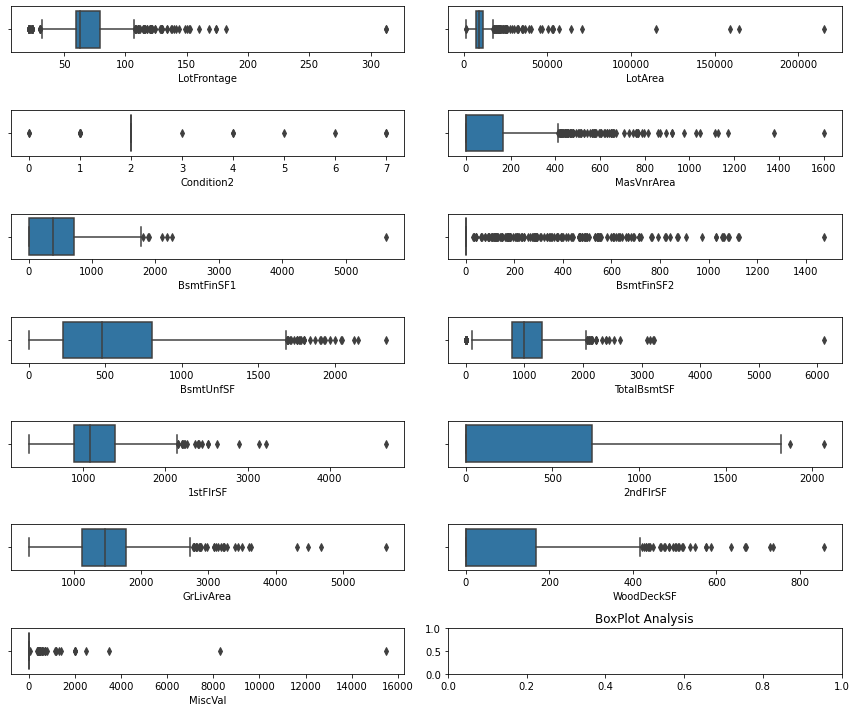

In [297]:
#Plot the box plot to check if our analysis is right
fig, ax = plt.subplots(7,2, figsize=(12,10))
axes_ = [axes_row for axes in ax for axes_row in axes]
for i, c in enumerate(outlier_col):
    sns.boxplot(train_df_eda[c], ax = axes_[i])
    plt.title("BoxPlot Analysis")
    plt.tight_layout()

In [299]:
target_col_eda = list(["LotFrontage", "LotArea", "Condition2", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "WoodDeckSF", "MiscVal", "SalePrice"])

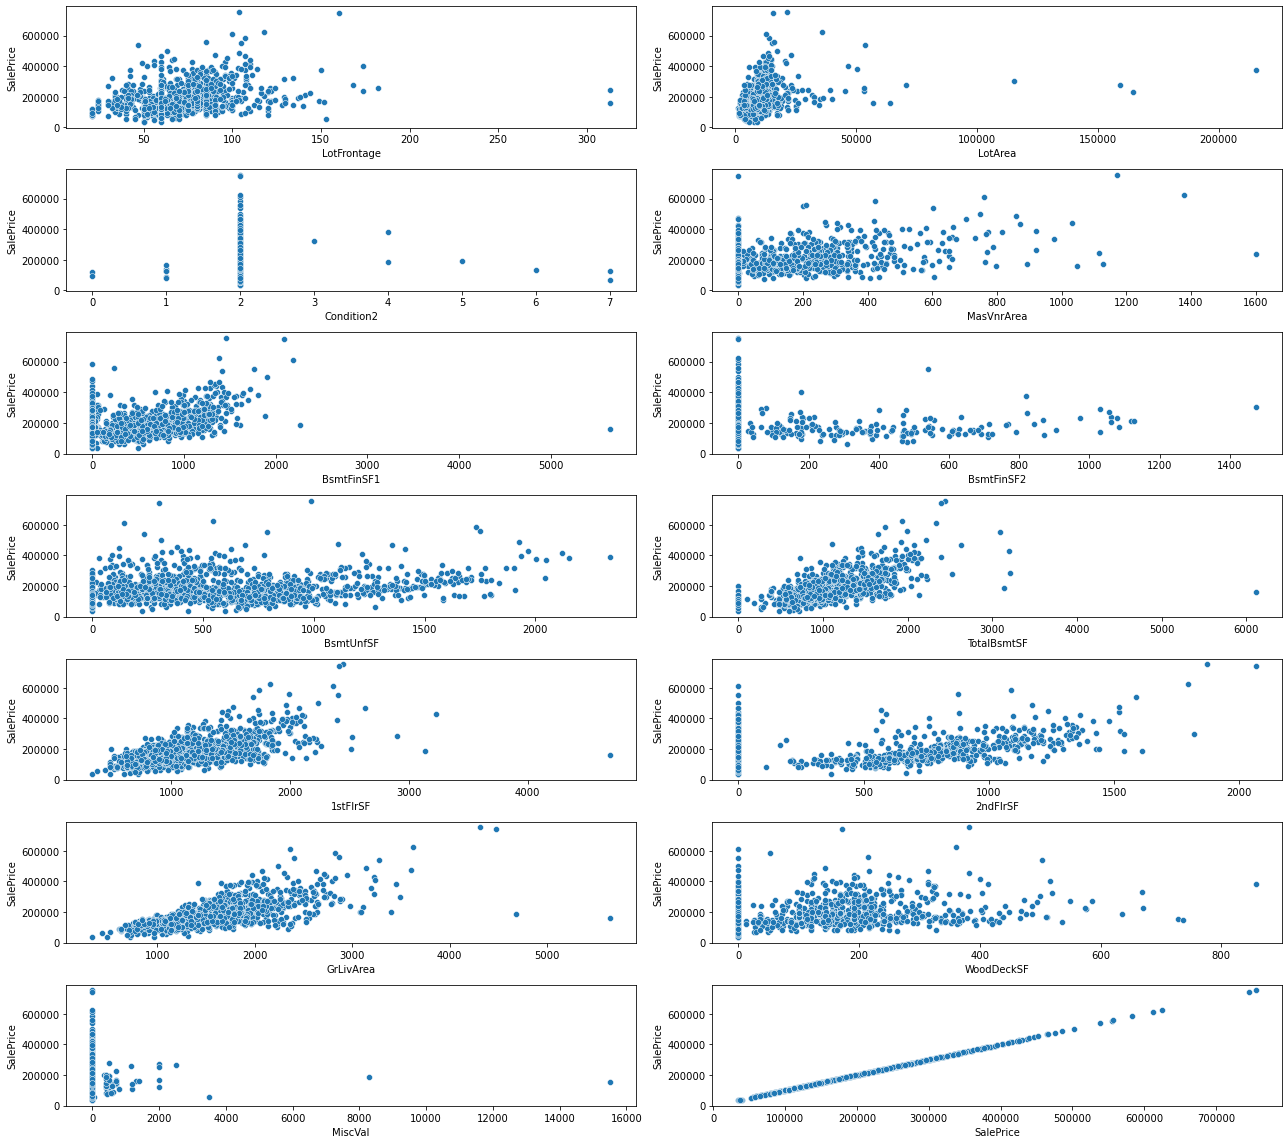

In [301]:
fig, ax = plt.subplots(7,2, figsize=(18,16))
axes_ = [axes_row for axes in ax for axes_row in axes]
for i, c in enumerate(target_col_eda):
    sns.scatterplot(train_df_eda[c], train_df_eda["SalePrice"], ax = axes_[i])
    plt.tight_layout()

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


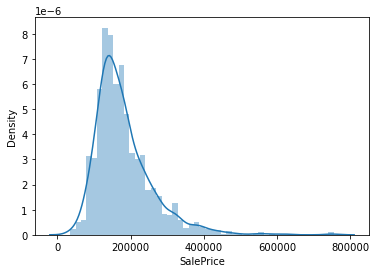

In [317]:
sns.distplot(train_df_eda["SalePrice"])
print("Skewness:", train_df_eda["SalePrice"].skew())
print("Kurtosis:", train_df_eda["SalePrice"].kurt())

# The sale price has a positive skewness and the shape is laptokurtic

In [352]:
len(train_df_eda.columns)

76

In [353]:
len(outlier_col)

13

In [362]:
no_outlier_col = []

In [367]:
for i in train_df_eda.columns:
    if i in outlier_col:
        print("Available")
    else:
        no_outlier_col.append(i)

Available
Available
Available
Available
Available
Available
Available
Available
Available
Available
Available
Available
Available


In [368]:
train_df_eda[no_outlier_col]

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,1,3,3,0,4,0,5,2,...,61,0,0,0,0,2,2008,8,4,208500.0
1,20,3,1,3,3,0,2,0,24,1,...,0,0,0,0,0,5,2007,8,4,181500.0
2,60,3,1,0,3,0,4,0,5,2,...,42,0,0,0,0,9,2008,8,4,223500.0
3,70,3,1,0,3,0,0,0,6,2,...,35,272,0,0,0,2,2006,8,0,140000.0
4,60,3,1,0,3,0,2,0,15,2,...,84,0,0,0,0,12,2008,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,1,3,3,0,4,0,8,2,...,40,0,0,0,0,8,2007,8,4,175000.0
1456,20,3,1,3,3,0,4,0,14,2,...,0,0,0,0,0,2,2010,8,4,210000.0
1457,70,3,1,3,3,0,4,0,6,2,...,60,0,0,0,0,5,2010,8,4,266500.0
1458,20,3,1,3,3,0,4,0,12,2,...,0,112,0,0,0,4,2010,8,4,142125.0


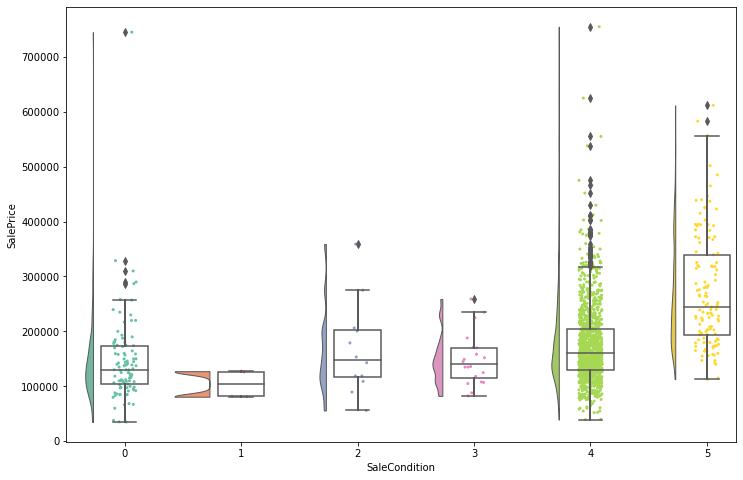

In [369]:
plt.figure(figsize=(12,8))
pt.RainCloud(x = "SaleCondition", y = "SalePrice", data = train_df_eda, 
                 width_viol = 0.6,
                 width_box = 0.4,
                 orient = 'v')

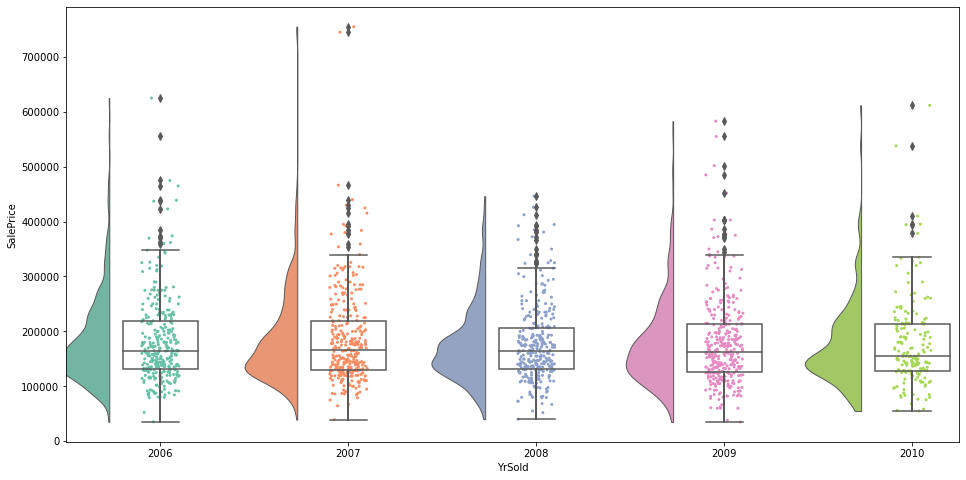

In [374]:
plt.figure(figsize=(16,8))
pt.RainCloud(x = "YrSold", y = "SalePrice", data = train_df_eda, 
                 width_viol = 0.6,
                 width_box = 0.4,
                 orient = 'v')

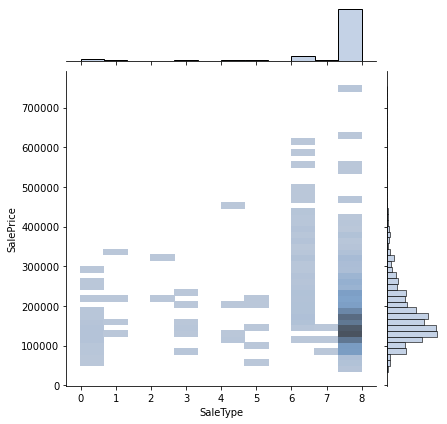

In [386]:
sns.jointplot(x = "SaleType", y = "SalePrice", data = train_df_eda, kind = "hist", color = "lightsteelblue")

In [389]:
corr = train_df_eda.corr()

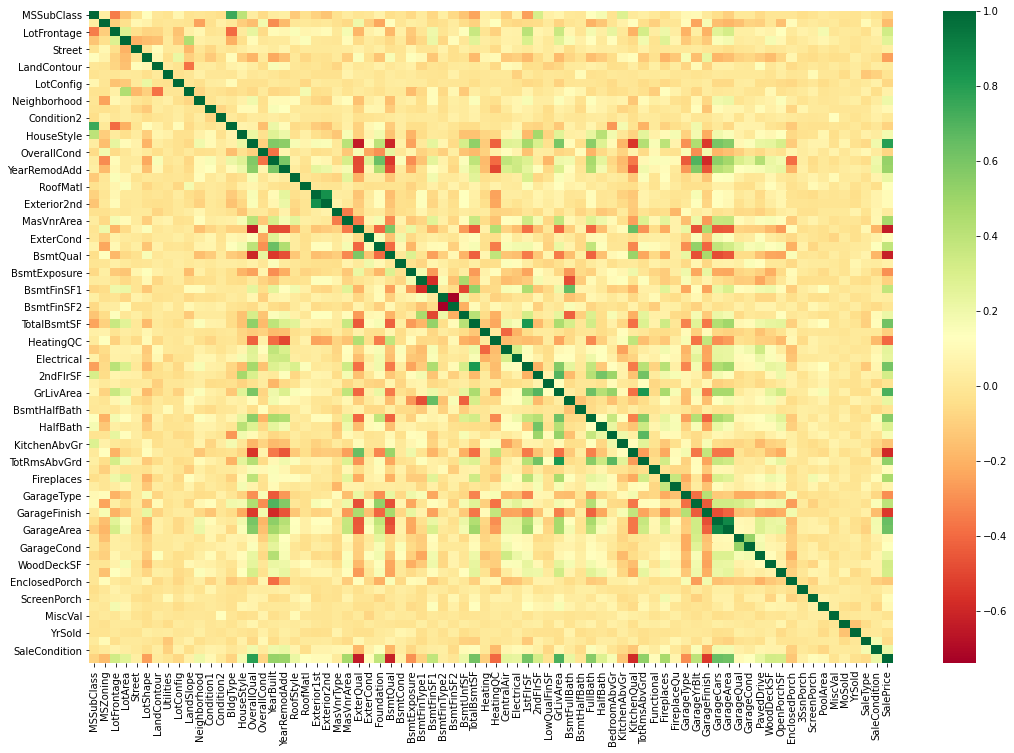

In [397]:
#checking for multicollinearity
plt.figure(figsize=(18,12))
sns.heatmap(corr, cmap = "RdYlGn")

In [564]:
#filtering the features having threshold of 0.45 with our target variable 
corrmat = corr.index[abs(corr["SalePrice"] > 0.45)]

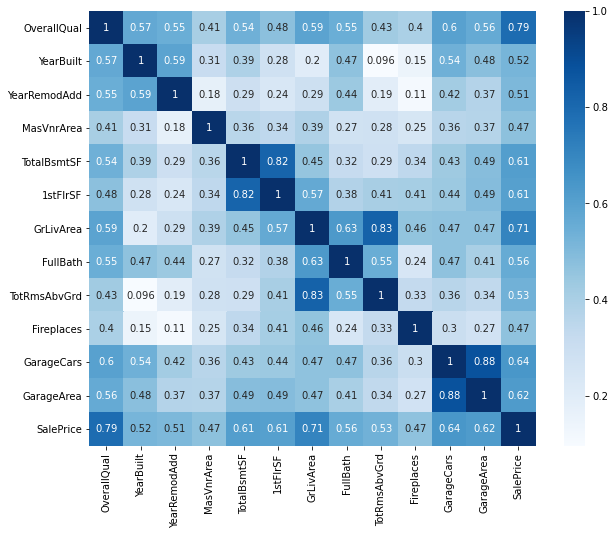

In [565]:
plt.figure(figsize=(10,8))
sns.heatmap(train_df_eda[corrmat].corr(), annot = True, cmap = "Blues")

1) Based on the above correlation heatmap, we can see that **TotRmsAbvGrd** has a strong correlation with **GLivArea** but have a weak correlation with the **SalePrice**.

2) **GarageCars** have high correlation with **GarageArea** but **GarageArea** have slight weak correlation with the **SalePrice** so we can choose either one but probably go with **GarageCars**. 

3) **1stFlrSF** have a high correlation with **TotalBsmtSF**

Let's explore the relationship of these variables with our Target Variable for better understanding 

In [569]:
strong_correlation = corrmat.drop(labels = ["TotRmsAbvGrd", "GarageCars", "1stFlrSF"])

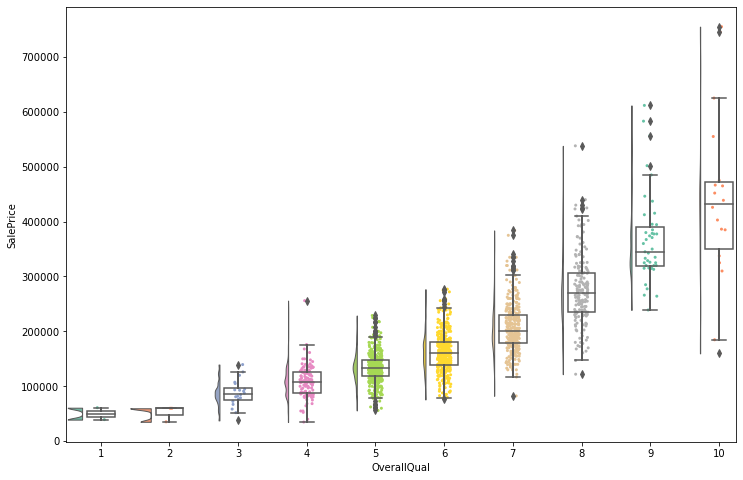

In [424]:
plt.figure(figsize=(12,8))
pt.RainCloud(x = "OverallQual", y = "SalePrice", data = train_df_eda, 
                 width_viol = 0.6,
                 width_box = 0.4,
                 orient = 'v')

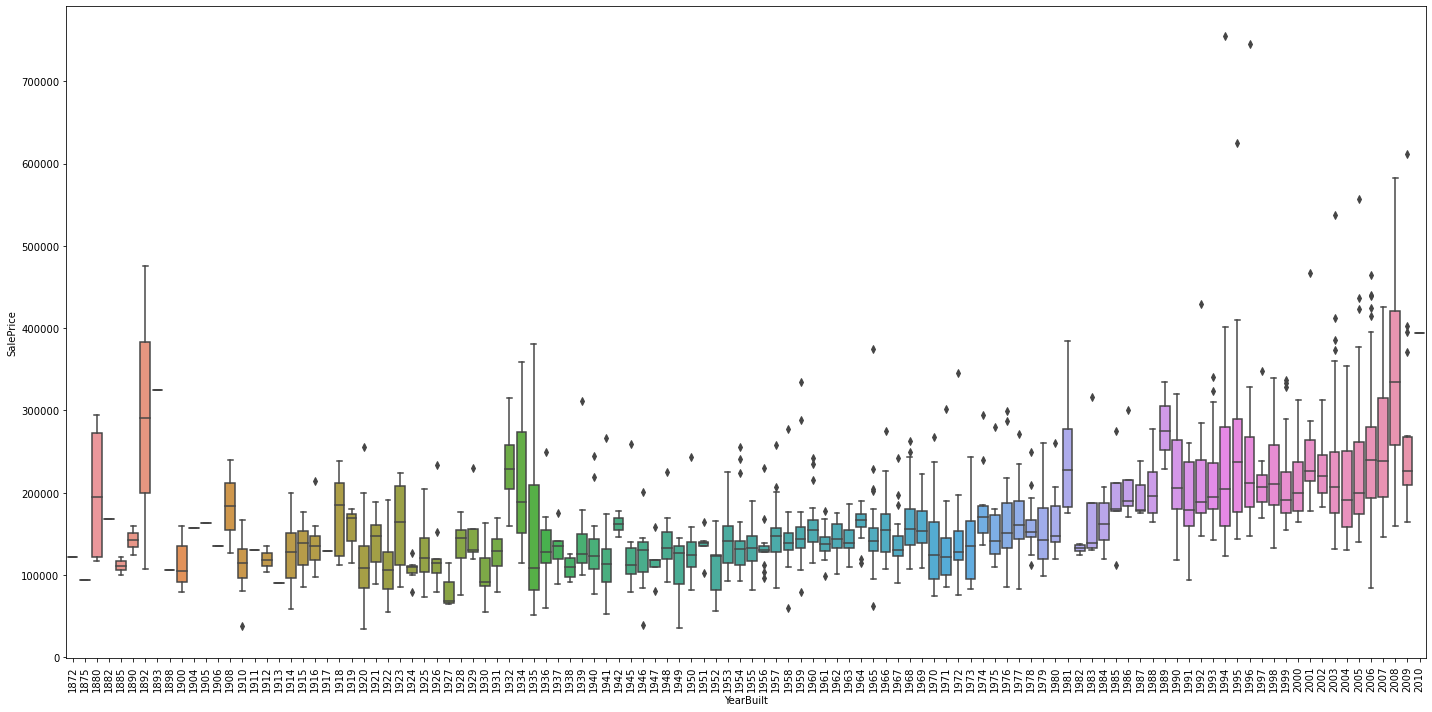

In [431]:
plt.figure(figsize=(20,10))
sns.boxplot(x = "YearBuilt", y = "SalePrice", data = train_df_eda)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

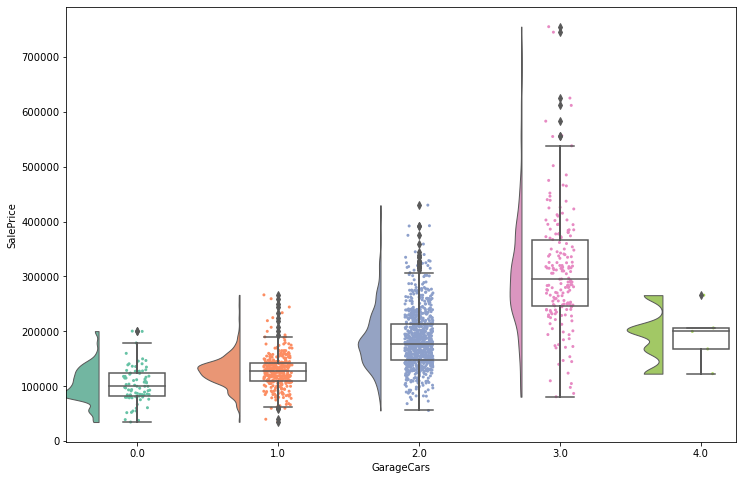

In [432]:
plt.figure(figsize=(12,8))
pt.RainCloud(x = "GarageCars", y = "SalePrice", data = train_df_eda, 
                 width_viol = 0.6,
                 width_box = 0.4,
                 orient = 'v')

<Figure size 864x576 with 0 Axes>

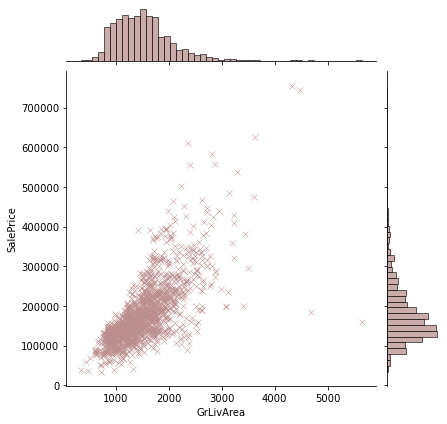

In [440]:
plt.figure(figsize=(12,8))
sns.jointplot(x = "GrLivArea", y = "SalePrice", data = train_df_eda, kind = "scatter", marker = 'x', color = "rosybrown")

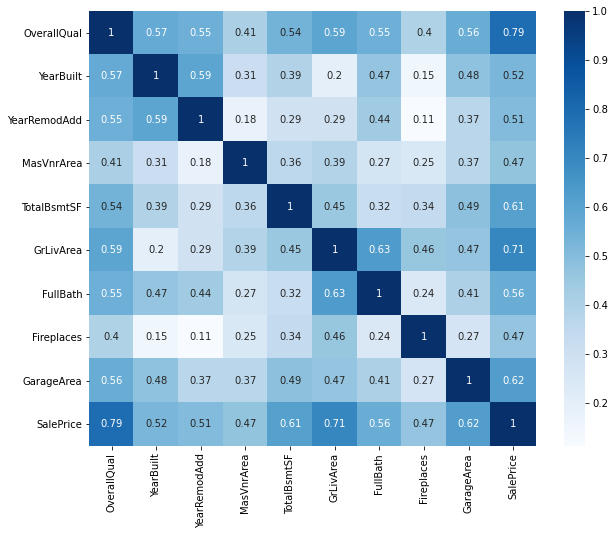

In [576]:
plt.figure(figsize=(10,8))
sns.heatmap(train_df_eda[strong_correlation].corr(), annot = True, cmap = "Blues")

#These features will be our final features which we will go with for further analysis

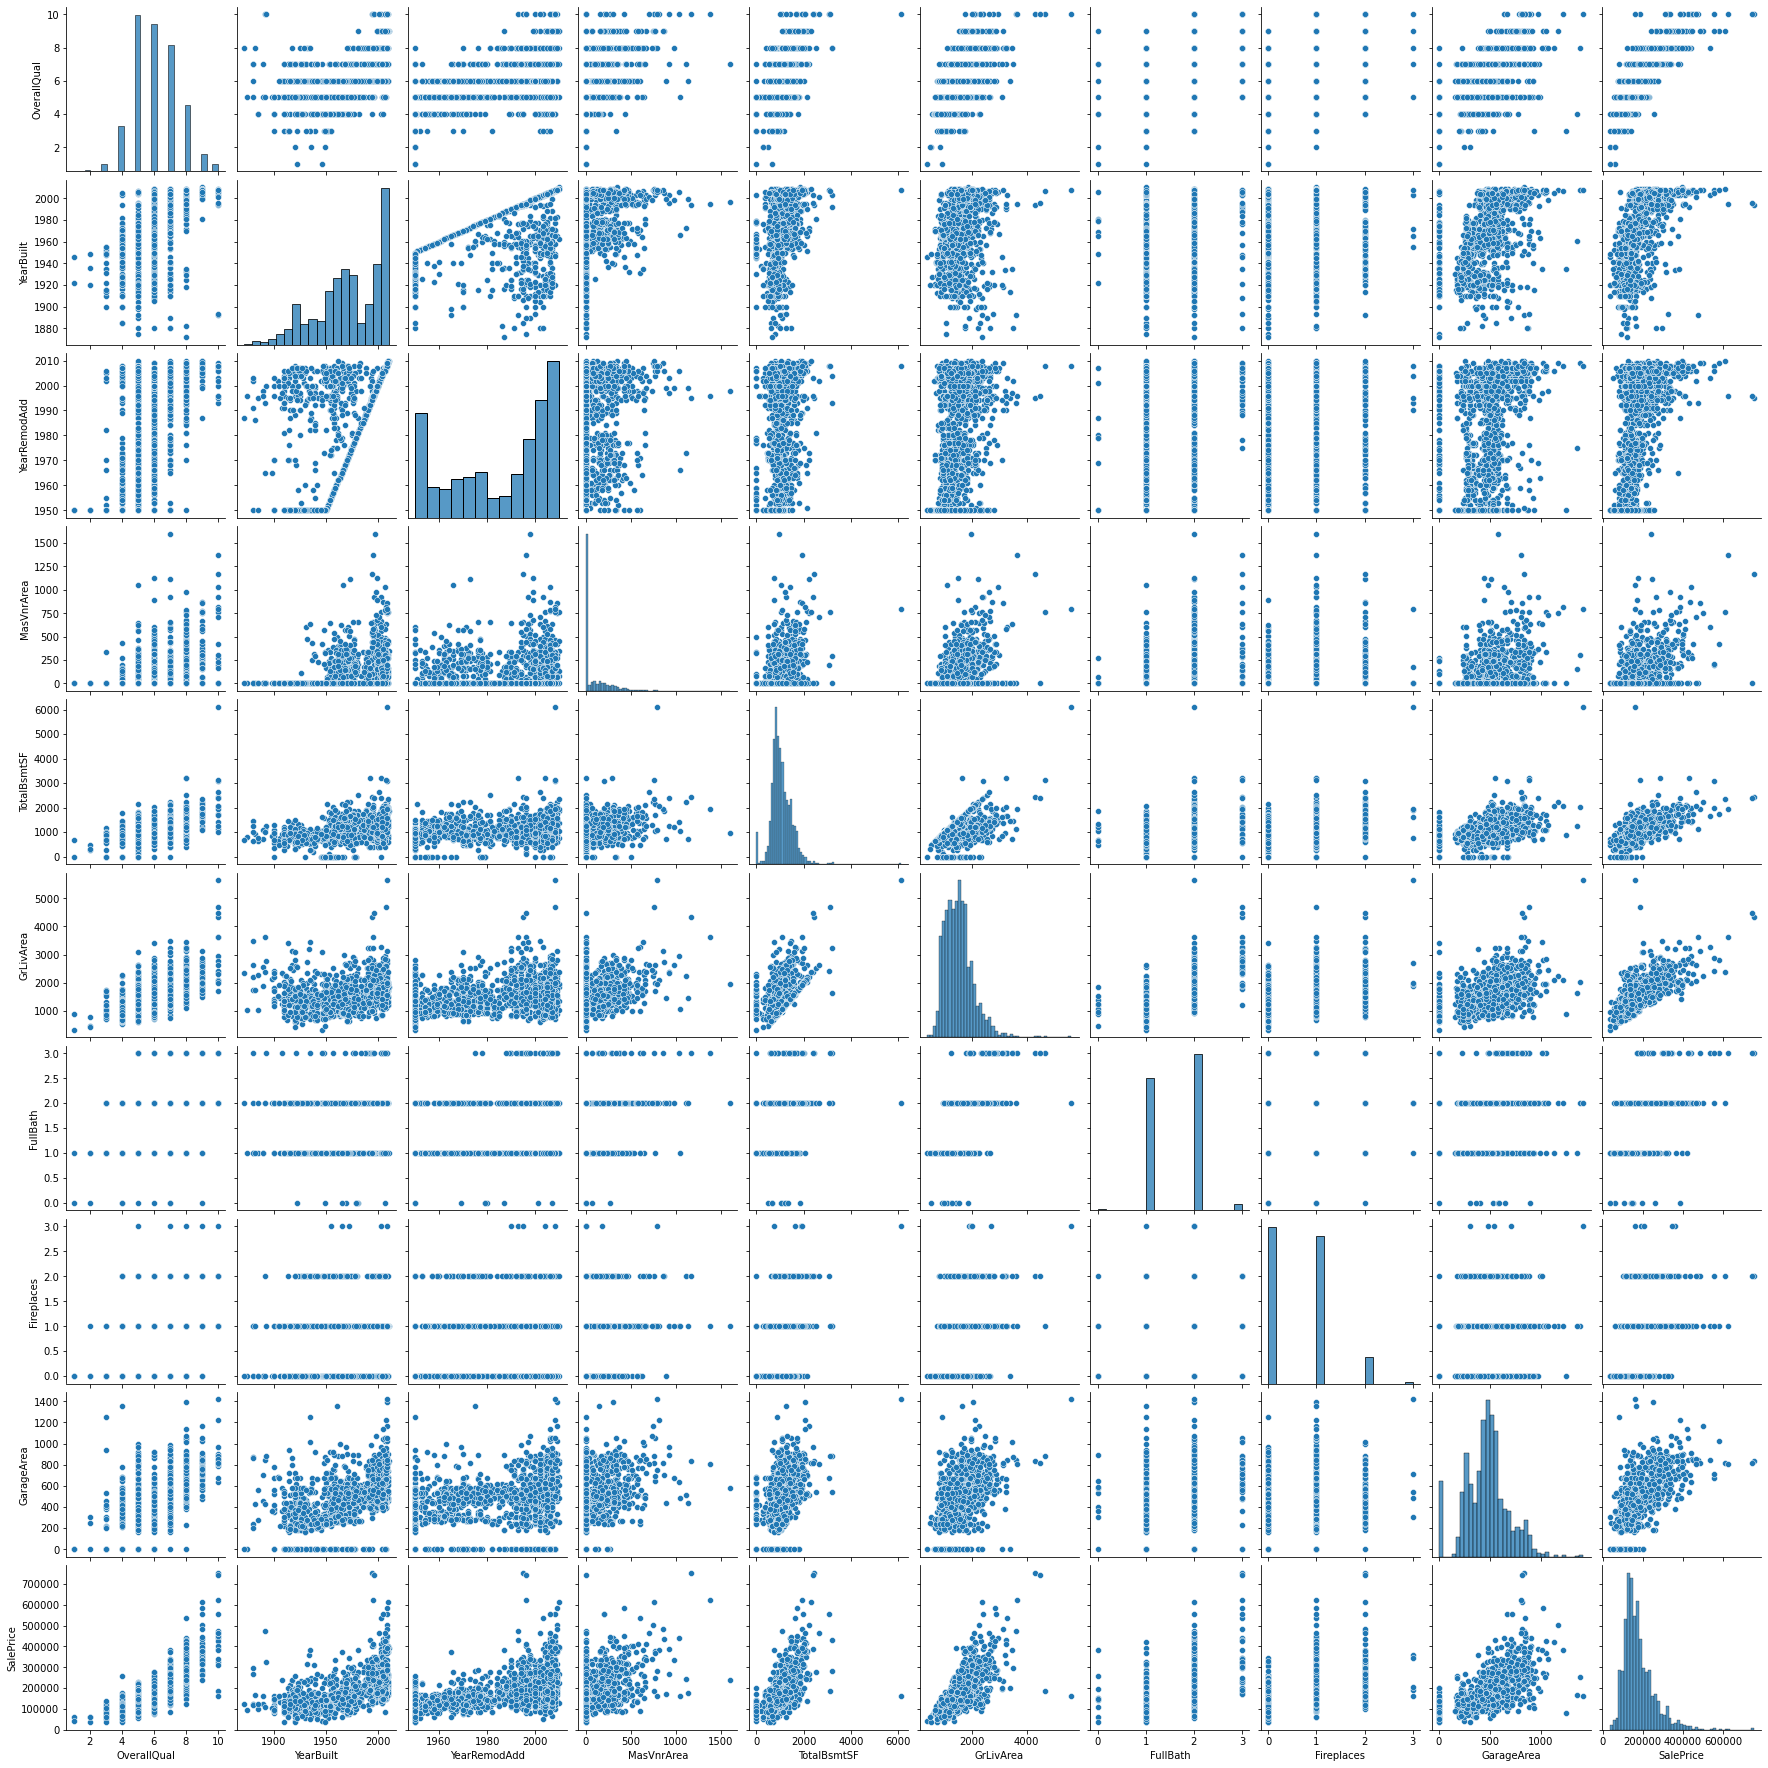

In [578]:
sns.pairplot(train_df_eda[strong_correlation])

In [583]:
for col in strong_correlation:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(train_df_eda[col].skew()))

OverallQual     Skewness: 00.22
YearBuilt       Skewness: -0.61
YearRemodAdd    Skewness: -0.50
MasVnrArea      Skewness: 02.68
TotalBsmtSF     Skewness: 01.52
GrLivArea       Skewness: 01.37
FullBath        Skewness: 00.04
Fireplaces      Skewness: 00.65
GarageArea      Skewness: 00.18
SalePrice       Skewness: 01.88


As we can see the YearBuilt and YearRemodAdd have negative skewness and rest are positively skewed.

In [584]:
final_train_df = train_df_eda[strong_correlation]

First we will try to build our model without any transformation after that we will try to do some tranformation in our data either log transformation, semi log transformation or box cox tranformation.

In [599]:
final_train_df.shape

(1460, 10)

In [600]:
# next step is to randomize the rows of the data
final_train_df = final_train_df.sample(frac=1).reset_index(drop=True)

In [601]:
X_train = final_train_df.iloc[:, :9]
y_train = final_train_df.iloc[:, 9]

In [604]:
se = StandardScaler()

In [605]:
standard_df = se.fit_transform(X_train)

In [608]:
X_train = pd.DataFrame(standard_df, columns = X_train.columns)

In [612]:
X_train_sm = sm.add_constant(X_train)

In [616]:
lr = sm.OLS(y_train, X_train_sm).fit()

In [617]:
lr.params

const           180921.195890
OverallQual      24896.629737
YearBuilt         7189.083110
YearRemodAdd      7689.247929
MasVnrArea        5812.519299
TotalBsmtSF      10892.827903
GrLivArea        24242.625120
FullBath         -1738.330643
Fireplaces        6885.218896
GarageArea        9242.384047
dtype: float64

In [618]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     572.0
Date:                Wed, 28 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:09:40   Log-Likelihood:                -17438.
No. Observations:                1460   AIC:                         3.490e+04
Df Residuals:                    1450   BIC:                         3.495e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.809e+05    977.673    185.053      0.000    1.79e+05    1.83e+05
OverallQual    2.49e+04   1624.374     15.327      0.000    2.17e+04    2.81e+04
YearBuilt     7189.0831   1490.697      4.823      0.000    4264.930    1.01e+04
YearRemodAdd  7689.2479   1307.796      5.880      0.000    5123.873    1.03e+04
MasVnrArea    5812.5193   1129.835      5.145      0.000    3596.234    8028.805
TotalBsmtSF   1.089e+04   1247.407      8.732      0.000    8445.912    1.33e+04
GrLivArea     2.424e+04   1631.691     14.857      0.000     2.1e+04    2.74e+04
FullBath     -1738.3306   1441.651     -1.206      0.228   -4566.275    1089.614
Fireplaces    6885.2189   1140.089      6.039      0.000    4648.820    9121.618
GarageArea    9242.3840   1291.721      7.155      0.000    6708.543    1.18e+04
==============================================================================
Omnibus:                      549.818   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78188.184
Skew:                          -0.660   Prob(JB):                         0.00
Kurtosis:                      38.827   Cond. No.                         4.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Based on the OLS summary, below are the conclusion:**

1) R squared and adjusted R square should be higher and close to 1 which in our case is 0.780 and 0.779.

2) Probability of F-statistic is 0 which is good it means that there is statistical significance between our features and target

3) There is one thing to notice here is that we are conducting this test on 0.05 alpha level so when you check the p-value of your t-test of "Full Bath" feature it is showing that the feature is not much relevant having the p value greater than 0.05 which means we can drop this from our model and it will not going to impact our model.

4) The Durbin Watson states that the relationship between our model features and target features is positive and is close to 2 which means it has some autocorrelation but that was very low. 

***For Reference: The Durbin Watson test value should be close to 2.***

5) The distribution is negatively skewed.

6) The data is tested at 1450 degreee of freedom.

In [620]:
y_train_pred = lr.predict(X_train_sm)

In [621]:
train_residual = (y_train - y_train_pred)

In [622]:
avg_res = np.mean(train_residual)

In [624]:
print(f"Average Mean residual value will be:", avg_res)

#This value should be close to 0 which in our case is close to 0

Average Mean residual value will be: 8.313529104096432e-11


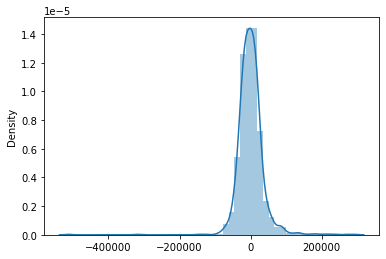

In [625]:
sns.distplot(train_residual)

In [628]:
X_train.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       'GrLivArea', 'FullBath', 'Fireplaces', 'GarageArea'],
      dtype='object')

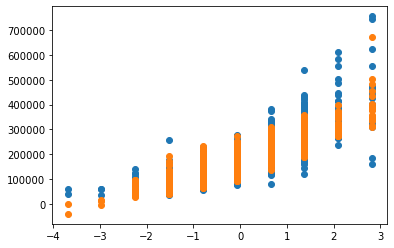

In [630]:
plt.scatter(x = X_train["OverallQual"], y = y_train)
plt.scatter(x = X_train["OverallQual"], y = y_train_pred)

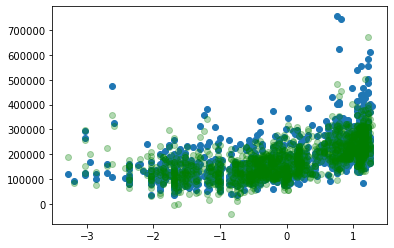

In [636]:
plt.scatter(x = X_train["YearBuilt"], y = y_train)
plt.scatter(x = X_train["YearBuilt"], y = y_train_pred, color = "green", alpha = 0.3)

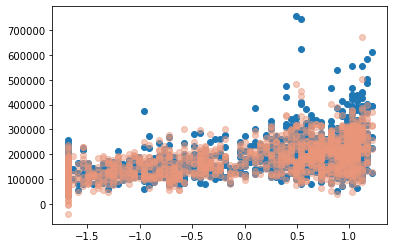

In [640]:
plt.scatter(x = X_train["YearRemodAdd"], y = y_train)
plt.scatter(x = X_train["YearRemodAdd"], y = y_train_pred, color = "darksalmon", alpha = 0.5)

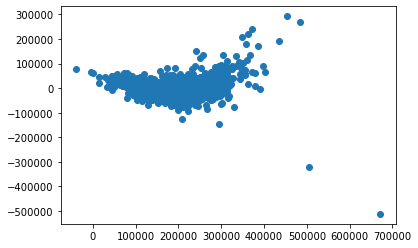

In [647]:
plt.scatter(y_train_pred, train_residual)

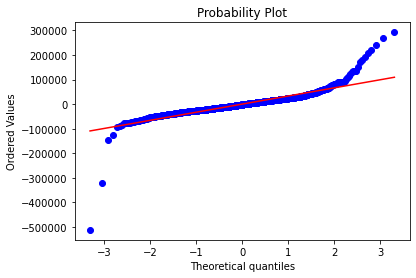

In [650]:
stats.probplot(train_residual, plot = plt)
plt.show()

#our residual is little bit skewed to the right.

In [651]:
import statsmodels.tsa.api as smt

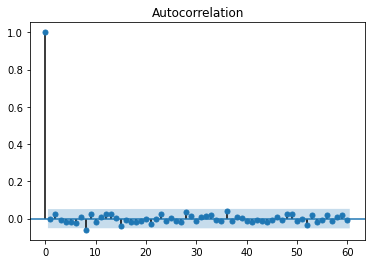

In [657]:
acf = smt.graphics.plot_acf(train_residual, alpha = 0.05, lags = 60)

#It seems there is very low autocorrelation in our residual which is fine but we will try to fine tune our model further by applying transformation.

In [661]:
X_train_new = X_train.drop(labels = "FullBath", axis = 1)

In [663]:
X_train_sm = sm.add_constant(X_train_new)

In [665]:
lr = sm.OLS(y_train, X_train_sm).fit()

In [666]:
lr.params

const           180921.195890
OverallQual      24785.363102
YearBuilt         6609.573180
YearRemodAdd      7543.965985
MasVnrArea        5896.090393
TotalBsmtSF      11043.438613
GrLivArea        23191.569406
Fireplaces        7009.331104
GarageArea        9286.545475
dtype: float64

In [667]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     643.1
Date:                Wed, 28 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:52:02   Log-Likelihood:                -17439.
No. Observations:                1460   AIC:                         3.490e+04
Df Residuals:                    1451   BIC:                         3.494e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.809e+05    977.826    185.024      0.000    1.79e+05    1.83e+05
OverallQual   2.479e+04   1622.005     15.281      0.000    2.16e+04     2.8e+04
YearBuilt     6609.5732   1411.318      4.683      0.000    3841.131    9378.015
YearRemodAdd  7543.9660   1302.438      5.792      0.000    4989.103    1.01e+04
MasVnrArea    5896.0904   1127.883      5.228      0.000    3683.634    8108.547
TotalBsmtSF   1.104e+04   1241.332      8.896      0.000    8608.441    1.35e+04
GrLivArea     2.319e+04   1379.564     16.811      0.000    2.05e+04    2.59e+04
Fireplaces    7009.3311   1135.610      6.172      0.000    4781.718    9236.944
GarageArea    9286.5455   1291.403      7.191      0.000    6753.328    1.18e+04
==============================================================================
Omnibus:                      530.140   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73443.962
Skew:                          -0.593   Prob(JB):                         0.00
Kurtosis:                      37.726   Cond. No.                         3.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After dropping the FullBath, there is no change the R value which is okay.

Now it's time to apply some non linear tranformation to our data.

Text(0.5, 1.0, 'Before Log Transformation')

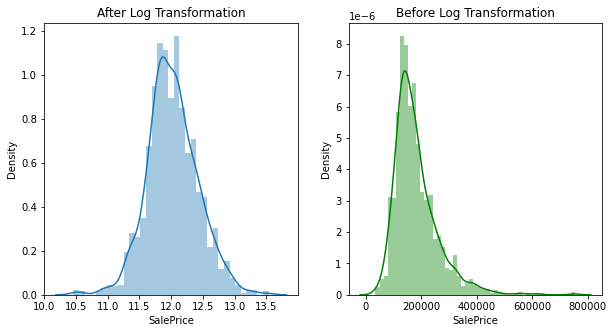

In [673]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(np.log(y_train))
plt.title("After Log Transformation")
plt.subplot(122)
sns.distplot((y_train), color = "green")
plt.title("Before Log Transformation")

Text(0.5, 1.0, 'Before Log Transformation')

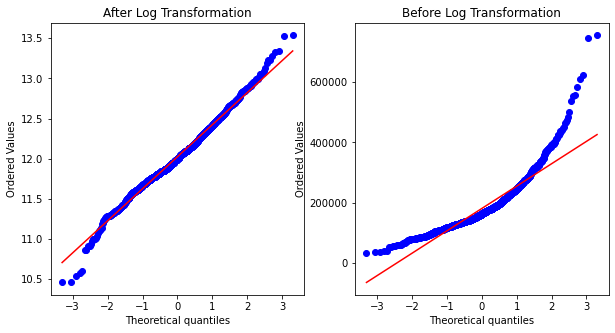

In [727]:
plt.figure(figsize=(10,5))
plt.subplot(121)
stats.probplot(np.log(y_train), plot = plt)
plt.title("After Log Transformation")
plt.subplot(122)
stats.probplot((y_train), plot = plt)
plt.title("Before Log Transformation")

In [674]:
logy_train = np.log(y_train)

In [677]:
lr_ = sm.OLS(logy_train, X_train_sm).fit()

In [678]:
lr_.params

const           12.024051
OverallQual      0.122132
YearBuilt        0.059323
YearRemodAdd     0.051934
MasVnrArea       0.000604
TotalBsmtSF      0.045714
GrLivArea        0.110055
Fireplaces       0.050886
GarageArea       0.055774
dtype: float64

In [680]:
lr_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     872.1
Date:                Wed, 28 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:16:00   Log-Likelihood:                 552.92
No. Observations:                1460   AIC:                            -1088.
Df Residuals:                    1451   BIC:                            -1040.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           12.0241      0.004   2764.353      0.000      12.016      12.033
OverallQual      0.1221      0.007     16.927      0.000       0.108       0.136
YearBuilt        0.0593      0.006      9.449      0.000       0.047       0.072
YearRemodAdd     0.0519      0.006      8.964      0.000       0.041       0.063
MasVnrArea       0.0006      0.005      0.120      0.904      -0.009       0.010
TotalBsmtSF      0.0457      0.006      8.279      0.000       0.035       0.057
GrLivArea        0.1101      0.006     17.934      0.000       0.098       0.122
Fireplaces       0.0509      0.005     10.073      0.000       0.041       0.061
GarageArea       0.0558      0.006      9.709      0.000       0.045       0.067
==============================================================================
Omnibus:                     1101.977   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65783.614
Skew:                          -2.944   Prob(JB):                         0.00
Kurtosis:                      35.353   Cond. No.                         3.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can see after applying the log transformation to our target variable has increased the model R value which is good.

In [682]:
y_train_pred = lr_.predict(X_train_sm)

In [684]:
res = logy_train - y_train_pred

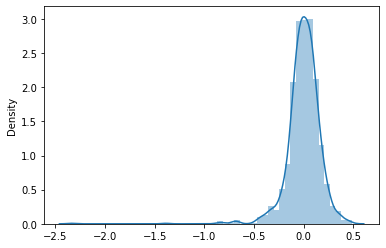

In [686]:
sns.distplot(res)

In [699]:
col = X_train_sm.columns.drop("const")

In [701]:
X_test = copy_test[col]

In [702]:
se = StandardScaler()

In [703]:
se_df = se.fit_transform(X_test)

In [706]:
X_test = pd.DataFrame(se_df, columns = X_test.columns)

In [707]:
# next step is to randomize the rows of the data
X_test = X_test.sample(frac=1).reset_index(drop=True)

In [712]:
X_train_sm

,const,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,Fireplaces,GarageArea
0,1.0,0.651479,1.150356,1.072482,-0.172232,0.457344,-0.490127,0.600495,0.818877
1,1.0,0.651479,1.183477,1.072482,0.646943,0.471025,2.247355,0.600495,1.492619
2,1.0,0.651479,0.918511,0.684854,1.333279,-0.181116,0.890036,0.600495,0.079632
3,1.0,1.374795,0.156734,-0.429577,-0.570750,1.157370,2.631897,0.600495,0.898416
4,1.0,-0.795151,-2.360443,-0.720298,-0.570750,-0.235841,1.710519,0.600495,0.219995
...,...,...,...,...,...,...,...,...,...
1455,1.0,-0.071836,1.084115,0.927122,-0.570750,-0.498066,0.147604,0.600495,-0.350814
1456,1.0,-0.795151,-0.571923,-1.495554,0.536244,0.480146,-0.471090,0.600495,-1.071344
1457,1.0,-0.795151,-1.631786,-1.689368,-0.570750,-0.146913,-0.889898,0.600495,-0.902909
1458,1.0,-0.795151,-1.698028,-1.689368,-0.570750,-1.052159,-0.615769,-0.951226,-1.328676


In [713]:
X_test_sm = sm.add_constant(X_test)

In [716]:
y_pred = lr_.predict(X_test_sm)

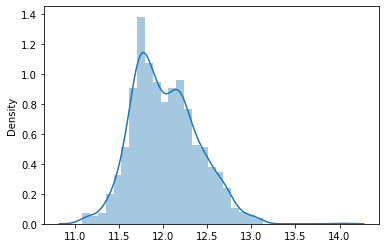

In [719]:
sns.distplot(y_pred)

In [721]:
y_pred

0       11.689947
1       12.717732
2       12.689090
3       12.682425
4       12.149471
          ...    
1454    11.760137
1455    11.898959
1456    12.427242
1457    12.021145
1458    11.727232
Length: 1459, dtype: float64